In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [264]:
header =['ISBN', 'Book_Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']

books = pd.read_csv('C:\Users\Helen\Desktop\BX-Books.csv', sep=';', names=header, skiprows=1, low_memory=False)


In [265]:
books.head(5)


,ISBN,Book_Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [266]:
books.describe().transpose()


,count,unique,top,freq
ISBN,271379,271379,0880015780,1
Book_Title,271379,242154,Selected Poems,27
Book-Author,271378,102042,Agatha Christie,632
Year-Of-Publication,271379,137,2002,17627
Publisher,271377,16824,Harlequin,7535
Image-URL-S,271379,271063,http://images.amazon.com/images/P/156205791X.0...,2
Image-URL-M,271379,271063,http://images.amazon.com/images/P/051513449X.0...,2
Image-URL-L,271376,271060,http://images.amazon.com/images/P/188364254X.0...,2


In [267]:
books.dtypes


ISBN                   object
Book_Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['ISBN', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']

le = LabelEncoder()
for i in var_mod:
    books[i] = le.fit_transform(books[i])
books.dtypes


ISBN                    int64
Book_Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher               int64
Image-URL-S             int64
Image-URL-M             int64
Image-URL-L             int64
dtype: object

In [5]:
# Viewing below the user table, "Age" attribute has missing values, for this type of problem
# not significant to the model. Therefore, I did not fill in missing values since this column will 
# be dropped. 

header = ['User_ID', 'Location', 'Age']
users = pd.read_csv('C:\Users\Helen\Desktop\BX-Users.csv', sep=';', names=header, skiprows=1, low_memory=False)

users.head(5)


,User_ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
header = ['User_ID', 'ISBN', 'Book_Rating']
bk_rating = pd.read_csv('C:\Users\Helen\Desktop\BX-Book-Ratings.csv', sep=';', names=header, skiprows=1, low_memory=False)
bk_rating.head(5)


,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['User_ID','ISBN', 'Book_Rating']

le = LabelEncoder()
for i in var_mod:
    bk_rating[i] = le.fit_transform(bk_rating[i])
bk_rating.dtypes


User_ID        int64
ISBN           int64
Book_Rating    int64
dtype: object

In [8]:
users.describe()
print users.dtypes


User_ID       int64
Location     object
Age         float64
dtype: object


In [268]:
print 'Size of book rating dataframe = ' + str(bk_rating.shape)
print 'Size of books dataframe = ' + str(books.shape)
print 'Size of users dataframe = ' + str(users.shape)


Size of book rating dataframe = (1149780, 3)
Size of books dataframe = (271379, 8)
Size of users dataframe = (278858, 3)


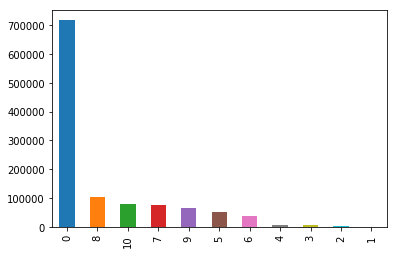

In [269]:
# Viewing the plot below, there are many books that have a rating of 0, meaning the book has not been rated
# The ratings (9,10) seem distributed and will use this criterian for analysis. 


bk_rating['Book_Rating'].value_counts().plot(kind='bar')


In [270]:

bk_query = bk_rating.query('Book_Rating == 8')
print bk_query.head(10)


     User_ID    ISBN  Book_Rating
6     104438  290525            8
20    104443  166639            8
27    104445  304928            8
28    104446  169947            8
44    104449  297928            8
77    104455  318852            8
83    104456   57001            8
109   104461  102687            8
114   104465  331622            8
118   104466  316428            8


In [271]:
# View of distributions of feature, "User-ID" and "ISBN", or the users vs. number of books read.

user_isbn = bk_query.groupby(["User_ID","ISBN"])["ISBN"].count()
user_isbn.head(50)



User_ID  ISBN  
14       6191      1
17       139557    1
19       101162    1
26       271213    1
31       88342     1
38       15482     1
         73698     1
41       319961    1
44       41480     1
         41578     1
47       161948    1
50       108465    1
         116179    1
61       325873    1
         338033    1
         338302    1
68       247966    1
         247988    1
         248710    1
         281848    1
         283172    1
         305624    1
         310196    1
         311813    1
         311990    1
         322092    1
         336811    1
         337037    1
         337132    1
         337346    1
         337364    1
         337509    1
         337633    1
         337634    1
         337774    1
         337957    1
         337959    1
         338028    1
         338213    1
         338215    1
         338249    1
         338257    1
         338269    1
         338275    1
         338410    1
         338508    1
76       8872     

In [272]:
num_of_users = bk_rating.User_ID.unique().shape[0]
print 'Total number of users:  '  + str(num_of_users)
num_of_books = bk_rating.ISBN.unique().shape[0]
print 'Total number of books:  '  + str(num_of_books)
num_of_ratings = bk_rating.Book_Rating.unique().shape[0]
print 'Total number of book ratings:  '  + str(num_of_ratings)


Total number of users:  105283
Total number of books:  340556
Total number of book ratings:  11


In [9]:
# Merge files, users and bk_rating to consolidate into one frame

bk_comb = pd.merge(bk_rating, books, on ='ISBN')
header =['Book-Author','Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
bk_comb = bk_comb.drop(header, axis=1)
bk_comb.head(10)


,User_ID,ISBN,Book_Rating,Book_Title
0,104433,57188,0,Free Spirit
1,805,57188,5,Free Spirit
2,2372,57188,0,Free Spirit
3,3159,57188,5,Free Spirit
4,3711,57188,9,Free Spirit
5,8750,57188,0,Free Spirit
6,10519,57188,0,Free Spirit
7,10605,57188,0,Free Spirit
8,14799,57188,0,Free Spirit
9,19022,57188,9,Free Spirit


In [10]:
# Extract score of 8 rating and use for analysis 

bk_comb_new = bk_comb[bk_comb['Book_Rating'] == 8]
bk_comb_new.head(10)


,User_ID,ISBN,Book_Rating,Book_Title
13,24223,57188,8,Free Spirit
14,29316,57188,8,Free Spirit
52,92218,57188,8,Free Spirit
91,24067,107392,8,Love Once &amp; Forever (Timeswept)
92,24475,107392,8,Love Once &amp; Forever (Timeswept)
122,58593,107392,8,Love Once &amp; Forever (Timeswept)
124,59714,107392,8,Love Once &amp; Forever (Timeswept)
127,63972,107392,8,Love Once &amp; Forever (Timeswept)
136,71673,107392,8,Love Once &amp; Forever (Timeswept)
149,82468,107392,8,Love Once &amp; Forever (Timeswept)


In [11]:
# Due to large matrix(rating table) and issues with "Memory Error", I filtered the data to use
# only ratings with score of 8
# First, create pivot table to generate a user / item matrix.The matrix created has values of "NaN" indicating no rating for 
# particular book, filled with 0's to show that user did not rate the book. Since, matrix is large and sparse, transforming
# the matrix to a sparse matrix one will help in handling complex matrix operations. 
# Use of scipy library module, "csr_matrix" will be used to transform to sparse matrix.     

book_rating_pivot = bk_comb_new.pivot(index='User_ID', columns ='ISBN', values ='Book_Rating').fillna(0)
print book_rating_pivot 
                 

ISBN     16      18      28      32      33      55      64      66      \
User_ID                                                                   
14          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
17          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
19          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
26          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
31          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
38          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
44          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
47          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
68          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
76          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
78          0.0     0.0  

In [12]:
# Convert matrix to sparse matrix for for further evaluation

from scipy.sparse import csr_matrix

new_bk_rating = csr_matrix(book_rating_pivot.values)
print new_bk_rating


  (0, 1021)	8.0
  (1, 28248)	8.0
  (2, 19834)	8.0
  (3, 50058)	8.0
  (4, 17152)	8.0
  (5, 3257)	8.0
  (5, 13783)	8.0
  (6, 7970)	8.0
  (6, 8001)	8.0
  (7, 32287)	8.0
  (8, 21675)	8.0
  (8, 23403)	8.0
  (9, 46122)	8.0
  (9, 46125)	8.0
  (9, 46298)	8.0
  (10, 1708)	8.0
  (11, 4831)	8.0
  (12, 21295)	8.0
  (13, 30997)	8.0
  (14, 24619)	8.0
  (15, 28162)	8.0
  (16, 2181)	8.0
  (16, 13865)	8.0
  (16, 39796)	8.0
  (17, 11826)	8.0
  :	:
  (28586, 30753)	8.0
  (28586, 34484)	8.0
  (28587, 26582)	8.0
  (28588, 2038)	8.0
  (28589, 23614)	8.0
  (28589, 28099)	8.0
  (28589, 36044)	8.0
  (28590, 30098)	8.0
  (28591, 33189)	8.0
  (28592, 38991)	8.0
  (28593, 21569)	8.0
  (28594, 14628)	8.0
  (28595, 30474)	8.0
  (28596, 9063)	8.0
  (28597, 5022)	8.0
  (28597, 15613)	8.0
  (28597, 27223)	8.0
  (28597, 28999)	8.0
  (28597, 32742)	8.0
  (28597, 39034)	8.0
  (28598, 1730)	8.0
  (28599, 44937)	8.0
  (28599, 47190)	8.0
  (28600, 22561)	8.0
  (28601, 28137)	8.0


In [250]:
new_query = np.random.choice(new_bk_rating.shape[0])
print new_query

target = new_bk_rating[new_query,:]
print target


22998
  (0, 5604)	8.0


In [251]:
# Split the matrix into train and test (80/20 %) 

from sklearn.model_selection import train_test_split
train_data, test_data =train_test_split(new_bk_rating, test_size=0.2)


In [252]:
# Fit model(knn) on training data

from sklearn.neighbors import NearestNeighbors
knn_model_t = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
knn_model_t.fit(train_data)


NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [253]:
dist,ind = knn_model_t.kneighbors(target, n_neighbors = 8)
print dist
print ind


[[0.         0.29289322 0.73273876 0.91780051 1.         1.
  1.         1.        ]]
[[ 2343 12272 10564 19974 15254 15255 15253 15257]]


In [254]:
from sklearn.metrics import mean_squared_error



In [255]:
def rmse(trains,tests): 
    return np.sqrt(np.vdot(trains,trains.T)/trains.size)


In [256]:
# Calculate RMSE on train data

train_rmse = rmse(train_data, target)
print train_rmse
print train_rmse[0,:].toarray()


  (0, 17514)	0.02961744388795462
  (0, 17353)	0.02961744388795462
  (0, 17006)	0.02961744388795462
  (0, 11607)	0.02961744388795462
  (0, 5689)	0.02961744388795462
  (0, 1512)	0.02961744388795462
  (0, 201)	0.02961744388795462
  (0, 0)	0.02961744388795462
  (1, 20812)	0.02961744388795462
  (1, 16774)	0.02961744388795462
  (1, 11074)	0.02961744388795462
  (1, 10749)	0.02961744388795462
  (1, 2075)	0.02961744388795462
  (1, 1)	0.02961744388795462
  (2, 2)	0.041885390829169554
  (3, 21309)	0.02961744388795462
  (3, 20474)	0.02961744388795462
  (3, 12155)	0.02961744388795462
  (3, 2019)	0.02961744388795462
  (3, 3)	0.051298917604257706
  (4, 21212)	0.02961744388795462
  (4, 19990)	0.02961744388795462
  (4, 11310)	0.02961744388795462
  (4, 22487)	0.02961744388795462
  (4, 21711)	0.02961744388795462
  :	:
  (22873, 19805)	0.02961744388795462
  (22873, 19642)	0.02961744388795462
  (22873, 18287)	0.02961744388795462
  (22873, 17991)	0.02961744388795462
  (22873, 11814)	0.02961744388795462
  (2

In [257]:
for i in range(0,len(dist.flatten())):
    if i == 0: 
        print ('Recommendation for Book:', books.Book_Title[ind.flatten()[i]])
    else:    
        
        print (i, books.Book_Title[ind.flatten()[i]]) 
            

('Recommendation for Book:', 'Sooner or Later')
(1, "The Midwife's Apprentice (Trophy Newbery)")
(2, 'Frische Goldjungs. Storys.')
(3, 'Teratologist')
(4, 'A Murder, a Mystery and a Marriage: A Story')
(5, 'An Artist of the Floating World (Vintage International)')
(6, 'Tangerine')
(7, 'The Ten Thousand: A Novel of Ancient Greece')


In [258]:
# Apply knn to test matrix 

knn_model_test = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
knn_model_test.fit(test_data)


NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [259]:
dist,ind = knn_model_test.kneighbors(target, n_neighbors = 8)
print dist
print ind


[[0. 1. 1. 1. 1. 1. 1. 1.]]
[[1485 3815 3813 3814 3812 3816 3818 3810]]


In [260]:
# Calculate RMSE on test data

test_rmse = rmse(test_data, target)
print test_rmse[0,:].toarray()


[[0.34307362 0.         0.         ... 0.         0.         0.        ]]


In [262]:
for i in range(0,len(dist.flatten())):
    if i == 0: 
        print ('Recommendation for Book:', books.Book_Title[ind.flatten()[i]])
    else:    
        
        print (i, books.Book_Title[ind.flatten()[i]]) 
            

('Recommendation for Book:', 'Bel Canto: A Novel')
(1, 'Becoming a Writer')
(2, 'French Lessons: A Memoir')
(3, 'The Boys of My Youth')
(4, 'The Dwarf')
(5, 'Fear of Flying')
(6, 'A Circle of Silver (Circle of Silver Chronicles)')
(7, 'The Women of Brewster Place (Penguin Contemporary American Fiction Series)')
